## Feature selection - with correlation
in this step we will be removing the features which are highly correlated

In [1]:

##import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
%matplotlib inline

In [3]:
data = load_boston()
df = pd.DataFrame(data.data,columns = data.feature_names)
df["MEDV"]=data.target

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
x =df.drop("MEDV",axis=1)
y=df["MEDV"]

In [8]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [12]:
### separate the dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(["MEDV"],axis=1),df["MEDV"],test_size =0.3,random_state=0)

X_train.shape,X_test.shape

((354, 13), (152, 13))

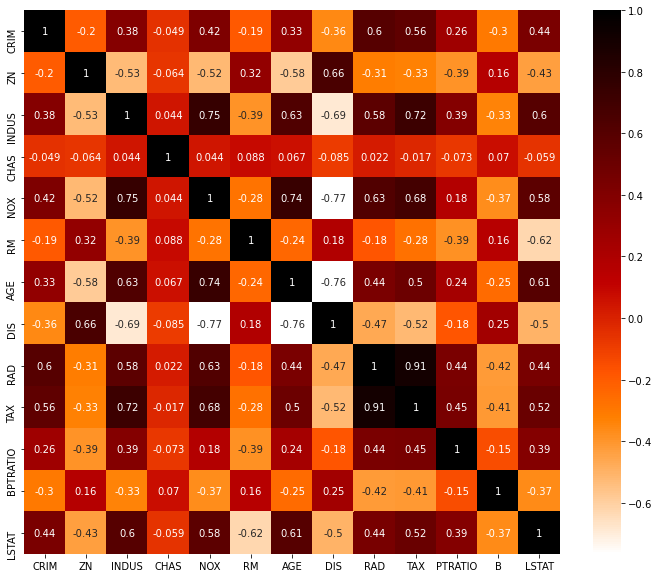

In [14]:
import seaborn as sns
##using pearson correlation
plt.figure(figsize = (12,10))
cor = X_train.corr()
sns.heatmap(cor,annot=True,cmap = plt.cm.gist_heat_r)
plt.show()

In [25]:
## with the following function we can select highly correlated features
## it will remove the first feature that is correlated with anything other feature


def correlation(dataset,threshold):
    col_corr = set()##set of all the names of correalted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:#we are interested in absolute coeff value
                colname = corr_matrix.columns[i]##getting the name column
                col_corr.add(colname)
                
    return col_corr             

In [26]:
corr_features = correlation(X_train , 0.7)
len(set(corr_features))

4

In [27]:
corr_features

{'AGE', 'DIS', 'NOX', 'TAX'}

In [28]:
X_train.drop(corr_features ,axis = 1)
X_test.drop(corr_features ,axis = 1)

,CRIM,ZN,INDUS,CHAS,RM,RAD,PTRATIO,B,LSTAT
329,0.06724,0.0,3.24,0.0,6.333,4.0,16.9,375.21,7.34
371,9.23230,0.0,18.10,0.0,6.216,24.0,20.2,366.15,9.53
219,0.11425,0.0,13.89,1.0,6.373,5.0,16.4,393.74,10.50
403,24.80170,0.0,18.10,0.0,5.349,24.0,20.2,396.90,19.77
78,0.05646,0.0,12.83,0.0,6.232,5.0,18.7,386.40,12.34
...,...,...,...,...,...,...,...,...,...
4,0.06905,0.0,2.18,0.0,7.147,3.0,18.7,396.90,5.33
428,7.36711,0.0,18.10,0.0,6.193,24.0,20.2,96.73,21.52
385,16.81180,0.0,18.10,0.0,5.277,24.0,20.2,396.90,30.81
308,0.49298,0.0,9.90,0.0,6.635,4.0,18.4,396.90,4.54


In [29]:
## learn with big dataset

In [30]:
df = pd.read_csv("dataset1.csv",nrows = 1000)
x = df.drop(labels=["TARGET"],axis = 1)
y = df["TARGET"]
##separate dataset into train and test
X_train,X_test,y_train,y_test = train_test_split(
    df.drop(labels=["TARGET"],axis = 1),df["TARGET"],test_size= 0.3,random_state=0)

<AxesSubplot:>

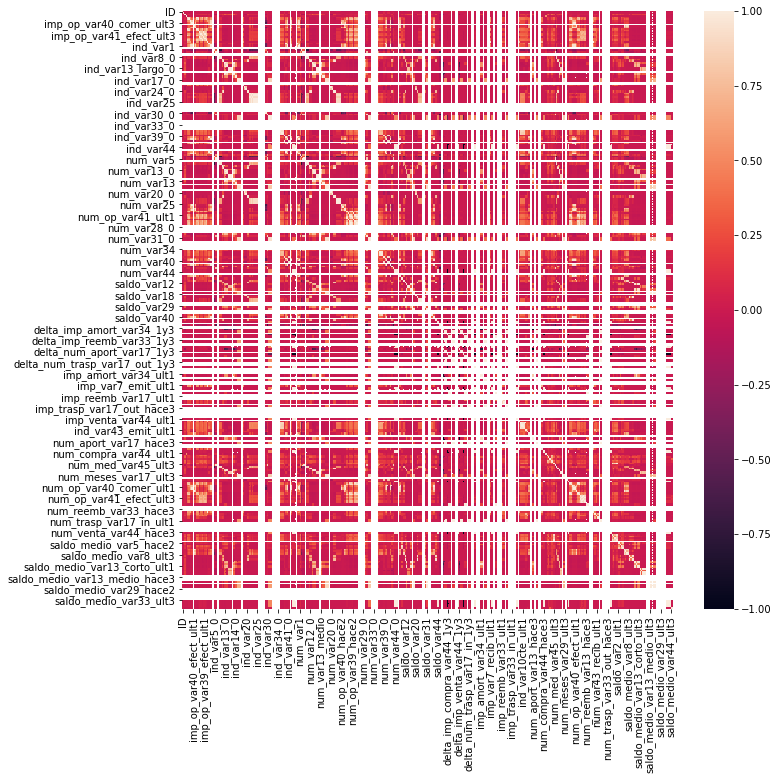

In [31]:
corrmat = X_train.corr()
fig,ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)

In [34]:
corr_features = correlation(X_train,0.9)
len(set(corr_features))

147

In [35]:
corr_features

{'delta_imp_compra_var44_1y3',
 'delta_imp_trasp_var17_in_1y3',
 'delta_imp_venta_var44_1y3',
 'delta_num_aport_var13_1y3',
 'delta_num_aport_var17_1y3',
 'delta_num_compra_var44_1y3',
 'delta_num_reemb_var13_1y3',
 'delta_num_trasp_var17_in_1y3',
 'delta_num_venta_var44_1y3',
 'imp_aport_var17_ult1',
 'imp_compra_var44_hace3',
 'imp_op_var39_efect_ult1',
 'imp_op_var39_efect_ult3',
 'imp_op_var39_ult1',
 'imp_op_var41_comer_ult1',
 'imp_op_var41_comer_ult3',
 'imp_reemb_var13_ult1',
 'imp_trasp_var17_in_ult1',
 'imp_var7_recib_ult1',
 'imp_venta_var44_ult1',
 'ind_var1',
 'ind_var10cte_ult1',
 'ind_var13',
 'ind_var13_corto',
 'ind_var13_largo',
 'ind_var17',
 'ind_var24',
 'ind_var24_0',
 'ind_var25',
 'ind_var25_0',
 'ind_var26',
 'ind_var26_0',
 'ind_var26_cte',
 'ind_var31',
 'ind_var37',
 'ind_var37_0',
 'ind_var39',
 'ind_var40',
 'ind_var40_0',
 'ind_var41_0',
 'ind_var44',
 'ind_var8',
 'ind_var9_cte_ult1',
 'ind_var9_ult1',
 'num_aport_var13_hace3',
 'num_aport_var17_ult1',
 

In [36]:
X_train.drop(corr_features,axis =1)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var17_hace3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,var38
105,195,2,28,0.0,0.00,0.00,0.0,0.0,0,0,...,0,0,0,0.0,0.0,0,0,0,0,93861.78
68,144,2,23,0.0,0.00,0.00,0.0,0.0,0,0,...,0,0,0,0.0,0.0,0,0,0,0,165258.42
479,965,2,24,0.0,0.00,0.00,0.0,0.0,0,0,...,0,0,0,0.0,0.0,0,0,0,0,61653.75
399,798,2,34,0.0,1200.45,1698.42,0.0,0.0,0,0,...,0,0,0,0.0,0.0,0,0,0,0,119707.20
434,864,2,28,0.0,0.00,0.00,0.0,0.0,0,0,...,0,0,0,0.0,0.0,0,0,0,0,109607.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,1660,2,38,0.0,0.00,0.00,0.0,0.0,0,0,...,0,0,0,0.0,0.0,0,0,0,0,45189.33
192,378,2,27,0.0,0.00,0.00,0.0,0.0,0,0,...,0,0,0,0.0,0.0,0,0,0,0,145599.06
629,1254,2,31,0.0,36.90,36.90,0.0,0.0,0,0,...,0,0,0,0.0,0.0,0,0,0,0,99613.92
559,1117,2,23,0.0,0.00,0.00,0.0,0.0,0,0,...,0,0,0,0.0,0.0,0,0,0,0,48869.88
